# Dither Patterns #

**Goal:** Plot MIRI dither patterns

**Author:** Boris Trahin, Staff Scientist II, MIRI team

**Last updated:** January 3, 2024

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dat_file = './MIRI_Imaging_Dithers.csv'
df = pd.read_csv(dat_file,lineterminator='\r')
df

,Pattern,Scale,Index,X-offset (arcseconds),Y-offset (arcseconds),Set Number
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Cycling,Large,1.0,-1.650,-3.960,NaN
2,Cycling,Large,2.0,1.045,0.550,NaN
3,Cycling,Large,3.0,2.640,9.185,NaN
4,Cycling,Large,4.0,7.975,6.985,NaN
...,...,...,...,...,...,...
1121,,NaN,NaN,NaN,NaN,NaN
1122,4-Point,Extended-256,1.0,7.535,-6.380,NaN
1123,4-Point,Extended-256,2.0,6.985,10.285,NaN
1124,4-Point,Extended-256,3.0,-8.910,8.085,NaN


In [11]:
a = df.to_numpy()
indx = [i for i in range(len(a)) if str(a[i][0])=='nan']
a = np.delete(a, indx, axis=0)

In [12]:
patterns = [x[0] for x in a]
scales = [x[1] for x in a]
indexes = [x[2] for x in a]
xoffsets = [x[3] for x in a]
yoffsets = [x[4] for x in a]
setnumbers = [x[5] for x in a]

In [13]:
def GetData(start, number, pattern, scale):
    #start: number of points or sets
    #npoints: number of points or sets
    #pattern: Cycling, 4-Point, 2-Point
    #scale: Large, Medium, Small, Point-Long, Point-Short
    if pattern not in patterns or (scale not in scales and scale is not None):
        print(f'Dither pattern {pattern} {scale} does not exist.')
        xdata, ydata = None, None
        return xdata, ydata
    elif pattern=='Cycling':
        xdata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern and scales[i]==scale]
        ydata_all = [yoffsets[i] for i in range(len(yoffsets)) if patterns[i]==pattern and scales[i]==scale]
        eff_indx = (start-1+number) % len(xdata_all)
        if eff_indx > start-1:
            xdata = xdata_all[start-1 : eff_indx]
            ydata = ydata_all[start-1 : eff_indx]
        else:
            xdata = xdata_all[start-1 : ] + xdata_all[ : eff_indx]
            ydata = ydata_all[start-1 : ] + ydata_all[ : eff_indx]
    elif pattern=='4-Point':
        xdata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern and scales[i]==scale]
        ydata_all = [yoffsets[i] for i in range(len(yoffsets)) if patterns[i]==pattern and scales[i]==scale]
        xdata = xdata_all[(start-1)*4 : number*4+(start-1)*4]
        ydata = ydata_all[(start-1)*4 : number*4+(start-1)*4]
    elif pattern=='2-Point':
        xdata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern]
        ydata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern]
        xdata = xdata_all
        ydata = ydata_all
    else:
        xdata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern and scales[i]==scale]
        ydata_all = [yoffsets[i] for i in range(len(yoffsets)) if patterns[i]==pattern and scales[i]==scale]
        xdata = xdata_all[(start-1) : number+(start-1)]
        ydata = ydata_all[(start-1) : number+(start-1)]
        
    return np.array(xdata), np.array(ydata)

In [14]:
def PlotDither(pattern, scale, xdata, ydata, color, linestyle, arrow=True, allpoints=False):
    if xdata is not None:
        if scale == 'Point-Long': scale = 'Long-Wave'
        if scale == 'Point-Short': scale = 'Short-Wave'
        if allpoints:
            xdata_all = [xoffsets[i] for i in range(len(xoffsets)) if patterns[i]==pattern and scales[i]==scale]
            ydata_all = [yoffsets[i] for i in range(len(yoffsets)) if patterns[i]==pattern and scales[i]==scale]
            plt.plot(xdata_all, ydata_all, marker='o', color='lightgrey', markersize=3, markeredgewidth=0, linestyle='', alpha=0.5)
        plt.plot(xdata, ydata, marker='o', color=color, markersize=3, markeredgewidth=0, linestyle=linestyle,  linewidth=0.3, label=f'{pattern} {scale}')
        if arrow:
            plt.quiver(xdata[:-1], ydata[:-1], xdata[1:]/2-xdata[:-1]/2, ydata[1:]/2-ydata[:-1]/2, scale_units='xy', angles='xy', 
                    scale=1, width=0.001, headwidth=12, headlength=14, headaxislength=6, color=color)
        plt.plot(xdata[0], ydata[0], marker='s', markeredgecolor=color, markeredgewidth=0.5, markersize=4, markerfacecolor='white')
        plt.plot(xdata[-1], ydata[-1], marker='s', color=color, markersize=4, markeredgewidth=0)

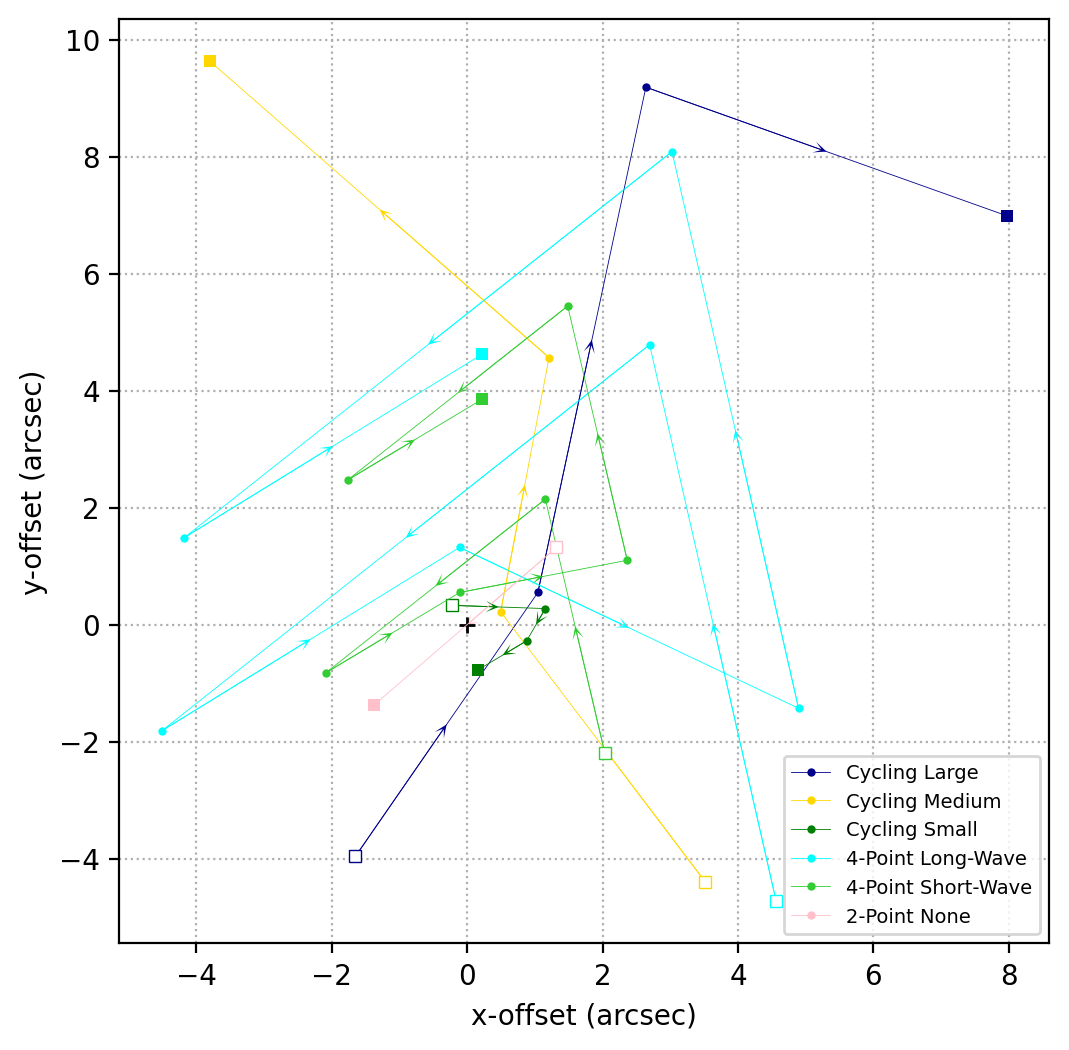

In [15]:
npoints = 4
startpoint = 1

fig, axs = plt.subplots(1, 1, figsize=(6,6), dpi=200)
axs.set_xlabel('x-offset (arcsec)')
axs.set_ylabel('y-offset (arcsec)')
plt.plot(0, 0, marker='+', color='black', markersize=6)

pattern, scale = 'Cycling', 'Large'
color = 'darkblue'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

pattern, scale = 'Cycling', 'Medium'
color = 'gold'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

pattern, scale = 'Cycling', 'Small'
color= 'green'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

npoints = 2
startpoint = 6

# pattern, scale = '4-Point', 'Extended'
# color = 'orange'
# xdata, ydata = GetData(startpoint, npoints, pattern, scale)
# PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

pattern, scale = '4-Point', 'Point-Long'
color = 'cyan'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

pattern, scale = '4-Point', 'Point-Short'
color = 'limegreen'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True, False)

pattern, scale = '2-Point', None
color = 'pink'
xdata, ydata = GetData(startpoint, npoints, pattern, scale)
PlotDither(pattern, scale, xdata, ydata, color, '-', True)

# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.grid(linestyle=':')
plt.legend(fontsize=7)